# **Data exploration**

## Carga datasets

In [1]:
import pandas as pd

# Cargar los datasets
movies_df = pd.read_csv("../data/movies_dataset.csv")
users_test_df = pd.read_csv("../data/users_test.csv")

# Mostrar información general de los datasets
movies_info = movies_df.info()
movies_head = movies_df.head()

users_info = users_test_df.info()
users_head = users_test_df.head()

movies_info, movies_head, users_info, users_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             4900 non-null   object
 1   user             4900 non-null   object
 2   rating           4900 non-null   int64 
 3   theme            4900 non-null   object
 4   production_year  4900 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 191.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  143 non-null    int64 
 1   user        143 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


(None,
            name     user  rating   theme  production_year
 0  12 Angry Men  user169       6  Sci-Fi             2021
 1  12 Angry Men  user425       9  Sci-Fi             2015
 2  12 Angry Men  user321       8  Sci-Fi             2021
 3  12 Angry Men  user329       4  Sci-Fi             2015
 4  12 Angry Men  user303       1  Sci-Fi             2021,
 None,
    Unnamed: 0     user
 0           0  user169
 1           1  user425
 2           2  user321
 3           3  user329
 4           4  user303)


### **`movies_dataset.csv`**
   - Contiene **4,900 registros** y **5 columnas**:
     - `name`: Nombre de la película.
     - `user`: ID del usuario que calificó la película.
     - `rating`: Calificación de la película (entero).
     - `theme`: Género de la película.
     - `production_year`: Año de producción.
   - No tiene valores nulos.

### **`users_test.csv`**
   - Contiene **143 registros** y **2 columnas**:
     - `Unnamed: 0`: Parece ser un índice innecesario.
     - `user`: ID de usuario para el que debemos hacer predicciones.



### Eliminamos la columna `Unnamed: 0` de `users_test`

In [2]:
users_test_df_cleaned = users_test_df.drop(columns=["Unnamed: 0"])
users_test_df_cleaned

,user
0,user169
1,user425
2,user321
3,user329
4,user303
...,...
138,user160
139,user55
140,user6
141,user85


## EDA `movies_dataset.csv`

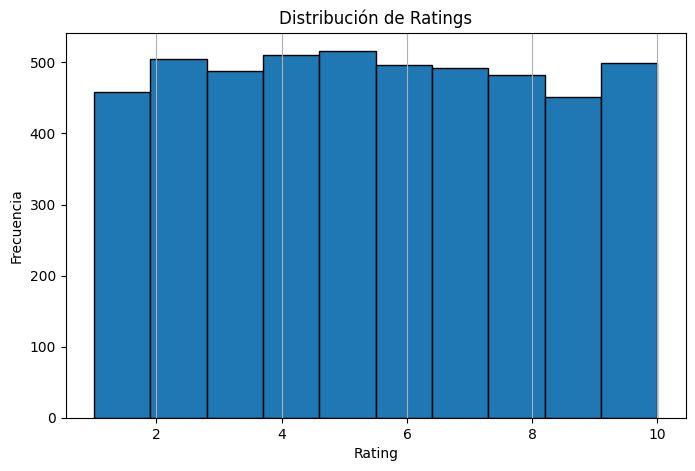

In [3]:
# Distribución de ratings

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
movies_df['rating'].hist(bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ratings')
plt.grid(axis='y')
plt.show()

In [4]:
# Contar cuántas películas hay por género
genre_counts = movies_df['theme'].value_counts()
print(genre_counts)

theme
Drama          729
Sci-Fi         640
Romance        581
Adventure      519
Documentary    481
Horror         469
Comedy         450
Action         389
Mystery        331
Fantasy        251
Crime           40
War             20
Name: count, dtype: int64


In [5]:
# Contar cuántas películas hay por año de producción
year_counts = movies_df['production_year'].value_counts().sort_index()
print(year_counts)

production_year
1972     20
1990    100
1991    181
1992     81
1993    200
1994    160
1995    250
1996    181
1997    131
1998    120
1999    220
2000    338
2001    170
2003    100
2004    250
2005    200
2006     50
2007    100
2008    270
2009    100
2010     70
2011    150
2012    100
2014    239
2015    269
2016    100
2017    119
2018     81
2019    200
2020    150
2021    200
Name: count, dtype: int64


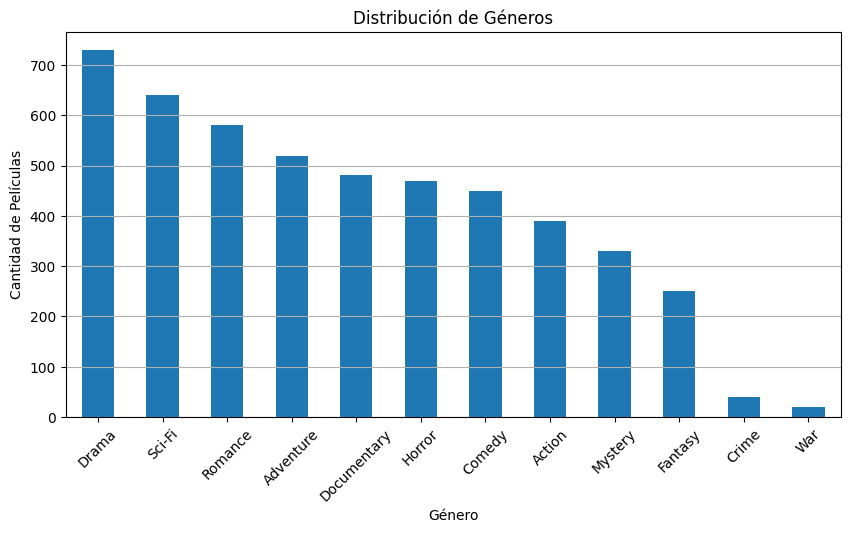

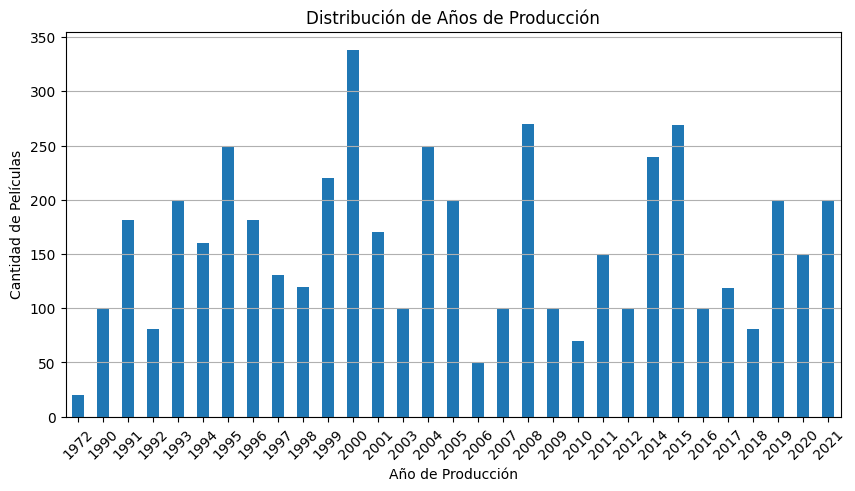

In [6]:
# Mostrar las distribuciones gráficamente
plt.figure(figsize=(10, 5))
genre_counts.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de Géneros')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 5))
year_counts.plot(kind='bar')
plt.xlabel('Año de Producción')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de Años de Producción')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [7]:
# Mostrar un resumen de estadísticas de las calificaciones
rating_summary = movies_df['rating'].describe()
rating_summary

count    4900.000000
mean        5.488367
std         2.846424
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: rating, dtype: float64

In [8]:
# Mostrar cuántos usuarios únicos hay en el dataset
unique_users = movies_df['user'].nunique()
unique_users

196

## Resumen EDA

### Distribución de Ratings
   - La media de las calificaciones es **5.49**, con una desviación estándar de **2.85**.
   - La mayoría de las calificaciones están entre **3 y 8**, con valores mínimos de **1** y máximos de **10**.

### Distribución de Géneros
   - Se observa una variedad de géneros con algunas categorías más representadas que otras.

### Distribución de Años de Producción
   - Existen películas de diferentes épocas, lo que puede ser relevante para el modelo.

### Cantidad de Usuarios Únicos
   - El dataset tiene **196 usuarios únicos**, lo que indica que los datos no son extremadamente densos, lo que podría afectar ciertos métodos de recomendación.



## Matriz Usuario - Película | Densidad de la matriz | Observaciones

In [9]:
# Crear la matriz usuario-película
import numpy as np

user_movie_matrix = movies_df.pivot_table(index='user', columns='name', values='rating')

# Calcular la densidad de la matriz (proporción de valores no nulos)
num_ratings = user_movie_matrix.count().sum()  # Número total de ratings existentes
total_possible_ratings = user_movie_matrix.size  # Número total de posibles ratings (usuarios * películas)
real_density = num_ratings / total_possible_ratings  # Densidad real

print("Matriz Usuario - Película") 
print(user_movie_matrix) 
print("\nDensidad")
print(real_density)


Matriz Usuario - Película
name     12 Angry Men  1917  A Clockwork Orange  A Separation  Alien  Aliens  \
user                                                                           
user1             NaN   NaN                 NaN           NaN    NaN     NaN   
user10            NaN   NaN                 NaN           NaN    NaN     NaN   
user100           NaN   NaN                 NaN           NaN    NaN     NaN   
user103           NaN   2.0                 6.0           6.0    4.0     9.0   
user104           NaN   NaN                 NaN           NaN    NaN     NaN   
...               ...   ...                 ...           ...    ...     ...   
user92           10.0   NaN                 NaN           NaN    NaN     NaN   
user93            NaN   NaN                 NaN           NaN    NaN     NaN   
user94           10.0   NaN                 NaN           NaN    NaN     NaN   
user95            NaN   NaN                 NaN           NaN    NaN     NaN   
user97        

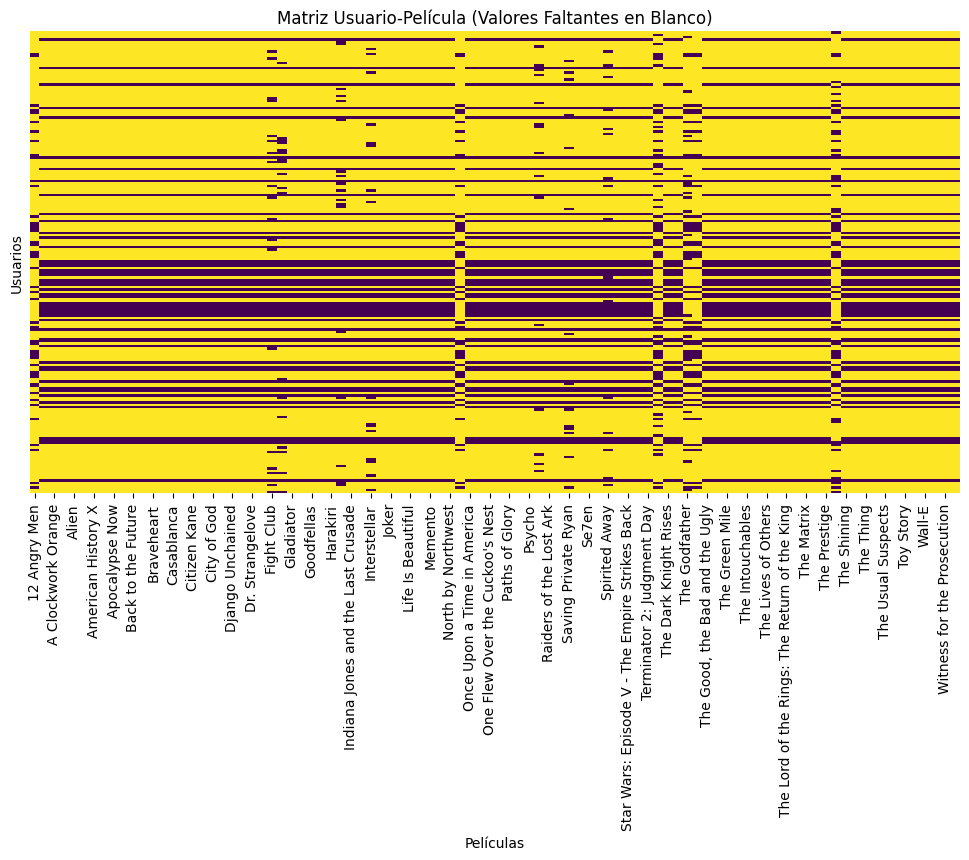

In [10]:
import seaborn as sns

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Visualizar la matriz de usuario-película con un mapa de calor
sns.heatmap(user_movie_matrix.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.xlabel("Películas")
plt.ylabel("Usuarios")
plt.title("Matriz Usuario-Película (Valores Faltantes en Blanco)")

# Mostrar el gráfico
plt.show()

**Observaciones**

- Solo el 26.4% de los posibles ratings están presentes en la matriz,
- Los espacios oscuros representan valores presentes (calificaciones dadas por los usuarios).
- Los espacios claros indican valores faltantes (películas no calificadas por ciertos usuarios).
- Podemos ver que hay una gran cantidad de valores faltantes, lo que es común en sistemas de recomendación.

**Implicaciones para el modelo de recomendación:**

- La matriz es dispersa, lo cual es común en sistemas de recomendación.
- El filtrado colaborativo basado en descomposición matricial (SVD) puede ser útil, ya que puede inferir relaciones entre usuarios y películas a pesar de los valores faltantes.
- El filtrado basado en ítems o usuarios con KNN puede necesitar técnicas para manejar la escasez de datos, como la imputación de valores faltantes.

# **Selección del modelo inicial** | SVD Filtrado colaborativo basado en descomposición matricial

Razones por las que SVD es una buena opción inicial:
- ✅ La matriz es dispersa (~26.4% de densidad), lo que significa que muchos usuarios no han calificado todas las películas. SVD es excelente para manejar esto al encontrar patrones en los datos existentes y hacer predicciones.

- ✅ Evita la necesidad de features adicionales. No necesitamos metadatos como géneros o años de producción, ya que el modelo aprende de las calificaciones dadas por los usuarios.

- ✅ Es escalable y eficiente en comparación con métodos basados en vecinos cercanos (KNN), que pueden volverse lentos cuando la cantidad de usuarios y películas crece.

- ✅ Es un estándar en sistemas de recomendación y fue la base de los ganadores del desafío Netflix Prize.

# **SVD** | 61/900 puntuación Nuwe

In [11]:
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix
import numpy as np

In [12]:
# Convertir la matriz usuario-película en una matriz dispersa
user_movie_sparse = csr_matrix(user_movie_matrix.fillna(0).values)

# Descomposición en valores singulares (SVD)
k = 50  # Número de factores latentes
U, sigma, Vt = svds(user_movie_sparse, k=k)

# Convertir sigma en una matriz diagonal
sigma = np.diag(sigma)

# Reconstrucción aproximada de la matriz de calificaciones
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Convertir la matriz reconstruida en un DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_movie_matrix.index, columns=user_movie_matrix.columns)

# Mostrar la matriz reconstruida con predicciones
predicted_ratings_df

name,12 Angry Men,1917,A Clockwork Orange,A Separation,Alien,Aliens,American History X,Amélie,Apocalypse Now,Avengers: Infinity War,...,The Thing,The Truman Show,The Usual Suspects,The Wall,Toy Story,Up,Wall-E,Whiplash,Witness for the Prosecution,Your Name
user,,,,,,,,,,,,,,,,,,,,,
user1,0.024890,-0.022238,-0.044507,0.031954,-0.028530,0.031517,-0.137909,-0.041579,0.025911,0.036462,...,0.064201,0.001732,-0.160836,-0.127480,0.080681,-0.097695,-0.016117,-0.083976,-0.013369,0.033883
user10,0.015288,-0.026319,0.002344,-0.015426,-0.007437,0.008256,-0.038726,-0.003981,-0.004467,0.016419,...,-0.010729,-0.029325,-0.012917,-0.026847,0.028608,-0.007094,-0.013258,0.026192,-0.046087,0.013343
user100,-0.003769,-0.005956,0.010114,-0.005776,-0.001003,-0.006513,0.004458,-0.002525,0.002682,-0.012311,...,-0.002611,0.003000,0.000027,0.011200,-0.008448,-0.000272,-0.003858,-0.006458,0.014236,-0.004760
user103,0.031023,1.750101,6.399739,6.133274,3.959077,8.744248,0.703814,3.449255,9.297908,1.225438,...,5.810479,7.556777,6.611102,0.486931,2.303452,1.822634,7.063321,2.698247,7.578781,3.415464
user104,-0.007142,-0.021405,0.029206,0.008568,0.025225,-0.054604,-0.004017,-0.022620,-0.020960,-0.005575,...,0.088660,0.064402,-0.054778,-0.034988,0.009971,-0.074485,0.012292,-0.031027,0.141427,-0.094595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user92,9.998147,0.005640,-0.010215,0.018266,-0.037055,-0.046356,0.005702,-0.057488,-0.035670,0.020445,...,0.100474,0.085440,-0.089128,-0.020039,-0.045924,-0.092992,-0.027305,-0.046450,0.137486,-0.093102
user93,0.030505,-0.010549,0.161912,0.196561,0.072529,-0.033572,0.189621,0.211309,-0.097972,0.005254,...,0.127653,0.126447,-0.156597,-0.020003,0.053583,-0.078851,0.015380,0.188335,0.067657,-0.084343
user94,10.041526,-0.052838,0.118998,0.169681,0.306635,-0.152694,0.098703,0.173178,-0.194501,0.466077,...,0.088539,-0.353224,-0.007565,-0.193534,0.161432,-0.019016,0.203141,0.306715,0.080226,-0.185593


- Cada celda representa una predicción del rating que un usuario daría a una película.
- Algunas predicciones son números negativos o fuera del rango esperado (1-10), lo cual ocurre debido a la descomposición SVD. Podemos normalizar o ajustar los valores posteriormente.

In [13]:
# Ajustar los valores predichos dentro del rango permitido (1-10)
predicted_ratings_df = predicted_ratings_df.clip(1, 10)
predicted_ratings_df


name,12 Angry Men,1917,A Clockwork Orange,A Separation,Alien,Aliens,American History X,Amélie,Apocalypse Now,Avengers: Infinity War,...,The Thing,The Truman Show,The Usual Suspects,The Wall,Toy Story,Up,Wall-E,Whiplash,Witness for the Prosecution,Your Name
user,,,,,,,,,,,,,,,,,,,,,
user1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
user10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
user100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
user103,1.000000,1.750101,6.399739,6.133274,3.959077,8.744248,1.0,3.449255,9.297908,1.225438,...,5.810479,7.556777,6.611102,1.0,2.303452,1.822634,7.063321,2.698247,7.578781,3.415464
user104,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user92,9.998147,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
user93,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
user94,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Filtrar usuarios de `users_test.csv`
users_to_predict = users_test_df_cleaned['user'].tolist()
predictions_for_users = predicted_ratings_df.loc[users_to_predict]

In [15]:
# Generar recomendaciones: seleccionar las 3 películas con mayor rating predicho por usuario
recommendations = {
    user: list(predictions_for_users.loc[user].nlargest(3).index)
    for user in predictions_for_users.index
}

recommendations

{'user169': ['A Separation', 'Up', 'Seven Samurai'],
 'user425': ['12 Angry Men', 'The Godfather', 'Oldboy'],
 'user321': ['The Dark Knight', '12 Angry Men', 'The Godfather Part II'],
 'user329': ['The Dark Knight', 'The Shawshank Redemption', 'The Godfather'],
 'user303': ['The Shawshank Redemption',
  'The Godfather',
  'The Godfather Part II'],
 'user410': ['The Godfather', 'The Shawshank Redemption', '12 Angry Men'],
 'user112': ['The Godfather', 'Oldboy', '12 Angry Men'],
 'user283': ['The Shawshank Redemption',
  'The Godfather',
  'The Godfather Part II'],
 'user203': ['The Shawshank Redemption', 'Oldboy', 'The Godfather'],
 'user375': ['Saving Private Ryan',
  'The Godfather Part II',
  "Schindler's List"],
 'user368': ['The Dark Knight', '12 Angry Men', 'The Godfather'],
 'user421': ['12 Angry Men', 'The Shawshank Redemption', 'Oldboy'],
 'user288': ['The Godfather', 'The Godfather Part II', 'Oldboy'],
 'user111': ['Oldboy', 'The Godfather Part II', 'Interstellar'],
 'user454'

In [16]:
# Guardar en formato JSON
import json

predictions_json = {"target": recommendations}
predictions_file_path = "../predictions/predictions.json"

with open(predictions_file_path, "w") as f:
    json.dump(predictions_json, f, indent=4)

# **KNN** | 103/900 puntuación Nuwe


In [17]:
from sklearn.neighbors import NearestNeighbors

In [18]:
# Convertir la matriz usuario-película en valores numéricos (rellenando NaN con 0)
user_movie_matrix_filled = user_movie_matrix.fillna(0)

In [19]:
# Entrenar modelo KNN basado en usuarios
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_movie_matrix_filled)

NearestNeighbors(algorithm='brute', metric='cosine')

In [20]:
# Generar recomendaciones basadas en usuarios más similares
def get_knn_recommendations(user_id, n_neighbors=5, n_recommendations=3):
    if user_id not in user_movie_matrix.index:
        return []  # Si el usuario no tiene datos previos, no podemos hacer recomendaciones

    # Encontrar vecinos más cercanos
    user_index = user_movie_matrix.index.get_loc(user_id)
    
    # Asegurar que los datos tengan las mismas columnas y formato que el modelo entrenado
    input_data = pd.DataFrame([user_movie_matrix_filled.iloc[user_index]], columns=user_movie_matrix_filled.columns)
    
    distances, indices = knn_model.kneighbors(input_data, n_neighbors=n_neighbors + 1)

    # Excluir al propio usuario y obtener vecinos más cercanos
    similar_users = [user_movie_matrix.index[i] for i in indices.flatten() if i != user_index]

    # Obtener películas mejor calificadas por estos vecinos
    neighbor_ratings = user_movie_matrix.loc[similar_users].mean()
    recommended_movies = list(neighbor_ratings.nlargest(n_recommendations).index)

    return recommended_movies

# Generar predicciones para usuarios en `users_test.csv`
knn_recommendations = {user: get_knn_recommendations(user) for user in users_to_predict}

# Guardar las recomendaciones en formato JSON
knn_predictions_json = {"target": knn_recommendations}
knn_predictions_file_path = "../predictions/knn_predictions.json"

with open(knn_predictions_file_path, "w") as f:
    json.dump(knn_predictions_json, f, indent=4)

# **Modelo Híbrido Benchmarck** 

## Benchmarck | 90/900 puntuación Nuwe

In [21]:
# # Convertir la matriz usuario-película en valores numéricos (rellenando NaN con 0)
# user_movie_matrix_filled = user_movie_matrix.fillna(0)
# user_movie_sparse = csr_matrix(user_movie_matrix_filled.values)  # Convertir a matriz dispersa

# Entrenar modelo KNN basado en usuarios
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_movie_matrix_filled)

# Aplicar SVD para la descomposición matricial
k = 50  # Factores latentes
U, sigma, Vt = svds(user_movie_sparse, k=k)
sigma = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma), Vt)
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_movie_matrix.index, columns=user_movie_matrix.columns)

# Generar recomendaciones híbridas
def get_hybrid_recommendations(user_id, n_neighbors=5, n_recommendations=3, knn_weight=0.6, svd_weight=0.4):
    if user_id not in user_movie_matrix.index:
        return []  # Si el usuario no tiene datos previos, no podemos hacer recomendaciones

    # Encontrar vecinos más cercanos
    user_index = user_movie_matrix.index.get_loc(user_id)
    input_data = pd.DataFrame([user_movie_matrix_filled.iloc[user_index]], columns=user_movie_matrix_filled.columns)
    distances, indices = knn_model.kneighbors(input_data, n_neighbors=n_neighbors + 1)

    # Excluir al propio usuario y obtener vecinos más cercanos
    similar_users = [user_movie_matrix.index[i] for i in indices.flatten() if i != user_index]
    neighbor_ratings = user_movie_matrix.loc[similar_users].mean()

    # Combinar KNN y SVD con pesos
    hybrid_scores = knn_weight * neighbor_ratings + svd_weight * predicted_ratings_df.loc[user_id]
    recommended_movies = list(hybrid_scores.nlargest(n_recommendations).index)

    return recommended_movies

# Generar predicciones para usuarios en `users_test.csv`
hybrid_recommendations = {user: get_hybrid_recommendations(user) for user in users_to_predict}

# Guardar las recomendaciones en formato JSON
hybrid_predictions_json = {"target": hybrid_recommendations}
hybrid_predictions_file_path = "../predictions/hybrid_predictions.json"

with open(hybrid_predictions_file_path, "w") as f:
    json.dump(hybrid_predictions_json, f, indent=4)


## Modelo híbrido | 161/900 puntuación Nuwe
- Encontrar vecinos más cercanos
- Excluir al propio usuario y obtener vecinos más cercanos
- Combinar KNN y SVD con pesos
- Incorporar filtrado basado en contenido (géneros preferidos)
- Penalización de películas demasiado populares

In [68]:
# Entrenar modelo KNN basado en usuarios
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_movie_matrix_filled)

# Aplicar SVD para la descomposición matricial
k = 50  # Factores latentes
U, sigma, Vt = svds(user_movie_sparse, k=k)
sigma = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma), Vt)
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_movie_matrix.index, columns=user_movie_matrix.columns)

# Función para obtener los géneros mejor calificados por un usuario
def get_top_genres(user_id, n=2):
    user_ratings = movies_df[movies_df['user'] == user_id]
    top_genres = user_ratings.groupby('theme')['rating'].mean().nlargest(n).index.tolist()
    return top_genres

# Generar recomendaciones híbridas mejoradas
def get_hybrid_recommendations(user_id, n_neighbors=5, n_recommendations=3, knn_weight=0.8, svd_weight=0.2):
    if user_id not in user_movie_matrix.index:
        return []  # Si el usuario no tiene datos previos, no podemos hacer recomendaciones

    # Encontrar vecinos más cercanos
    user_index = user_movie_matrix.index.get_loc(user_id)
    input_data = pd.DataFrame([user_movie_matrix_filled.iloc[user_index]], columns=user_movie_matrix_filled.columns)
    distances, indices = knn_model.kneighbors(input_data, n_neighbors=n_neighbors + 1)

    # Excluir al propio usuario y obtener vecinos más cercanos
    similar_users = [user_movie_matrix.index[i] for i in indices.flatten() if i != user_index]
    neighbor_ratings = user_movie_matrix.loc[similar_users].mean()

    # Combinar KNN y SVD con pesos
    hybrid_scores = knn_weight * neighbor_ratings + svd_weight * predicted_ratings_df.loc[user_id]
    
    # Incorporar filtrado basado en contenido (géneros preferidos)
    top_genres = get_top_genres(user_id)
    content_boost = movies_df[movies_df['theme'].isin(top_genres)].groupby('name')['rating'].mean()
    hybrid_scores.update(content_boost)
    
    # Penalización de películas demasiado populares
    movie_popularity = movies_df['name'].value_counts(normalize=True)
    hybrid_scores -= 0.1 * movie_popularity
    
    recommended_movies = list(hybrid_scores.nlargest(n_recommendations).index)
    return recommended_movies

# Generar predicciones para usuarios en `users_test.csv`
hybrid_recommendations = {user: get_hybrid_recommendations(user) for user in users_to_predict}

# Guardar las recomendaciones en formato JSON
hybrid_predictions_json = {"target": hybrid_recommendations}
hybrid_predictions_file_path = "../predictions/hybrid_predictions.json"

with open(hybrid_predictions_file_path, "w") as f:
    json.dump(hybrid_predictions_json, f, indent=4)
    

### Modificaciones sobre el modelo

GridSearch

In [ ]:
# Imports necesarios
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import json
import itertools

# Paso 1: Cargar los datasets
movies_df = pd.read_csv("../data/movies_dataset.csv")
users_test_df = pd.read_csv("../data/users_test.csv")

# Limpiar el dataset users_test_df
users_test_df_cleaned = users_test_df.drop(columns=["Unnamed: 0"])

# Obtener la lista de usuarios para predecir
users_to_predict = users_test_df_cleaned['user'].tolist()

# Paso 2: Dividir el conjunto de datos en entrenamiento y prueba para evaluación
train_df, test_df = train_test_split(movies_df, test_size=0.2, random_state=42)

# Crear el ground truth a partir del conjunto de prueba
ground_truth = test_df.groupby('user')['name'].apply(list).to_dict()

# Paso 3: Verificar y manejar duplicados en train_df
# Identificar duplicados
duplicate_entries = train_df.duplicated(subset=['user', 'name'], keep=False)
duplicates = train_df[duplicate_entries]

# Mostrar información sobre duplicados (opcional)
print(f"Número de entradas duplicadas: {duplicates.shape[0]}")
# print(duplicates.head())

# Resolver duplicados promediando las calificaciones
train_df_no_duplicates = train_df.groupby(['user', 'name', 'theme', 'production_year'], as_index=False)['rating'].mean()

# Crear la matriz usuario-película utilizando pivot_table
user_movie_matrix = train_df_no_duplicates.pivot_table(index='user', columns='name', values='rating', aggfunc='mean')
user_movie_matrix_filled = user_movie_matrix.fillna(0)
user_movie_sparse = csr_matrix(user_movie_matrix_filled.values)

# Obtener las dimensiones de la matriz usuario-película
num_users, num_movies = user_movie_matrix_filled.shape

# Paso 4: Precomputar las descomposiciones SVD
def compute_svd_matrices(k_values, user_movie_sparse):
    svd_matrices = {}
    min_dim = min(user_movie_sparse.shape) - 1  # Restamos 1 para cumplir la condición
    for k in k_values:
        k_adjusted = min(k, min_dim)
        if k_adjusted <= 0:
            # No es posible calcular SVD con k <= 0
            continue
        # Calcular SVD
        U, sigma, Vt = svds(user_movie_sparse, k=k_adjusted)
        sigma = np.diag(sigma)
        svd_matrices[k_adjusted] = (U, sigma, Vt)
    return svd_matrices

# Calcular las descomposiciones SVD una vez
k_latent_factors_list = [20, 50, 100]
k_latent_factors_set = set([min(k, min(user_movie_sparse.shape) - 1) for k in k_latent_factors_list])
svd_matrices = compute_svd_matrices(k_latent_factors_set, user_movie_sparse)

# Paso 5: Definir funciones auxiliares

# Función para obtener los géneros mejor calificados por un usuario
def get_top_genres(user_id, n=2):
    user_ratings = train_df_no_duplicates[train_df_no_duplicates['user'] == user_id]
    if user_ratings.empty:
        return []
    top_genres = user_ratings.groupby('theme')['rating'].mean().nlargest(n).index.tolist()
    return top_genres

# Función para generar recomendaciones híbridas con parámetros ajustables
def get_hybrid_recommendations(
    user_id,
    n_neighbors=5,
    n_recommendations=3,
    knn_weight=0.8,
    svd_weight=0.2,
    top_genres_n=2,
    popularity_penalty=0.1,
    k_latent_factors=50,
    distance_metric='cosine'
):
    # Verificar si el usuario está en los datos
    if user_id not in user_movie_matrix.index:
        return []
    
    # Ajustar k_latent_factors si es necesario
    min_dim = min(user_movie_sparse.shape) - 1  # Restamos 1 para cumplir la condición
    k_adjusted = min(k_latent_factors, min_dim)
    if k_adjusted <= 0 or k_adjusted not in svd_matrices:
        svd_prediction_user = pd.Series(0, index=user_movie_matrix.columns)
    else:
        U, sigma, Vt = svd_matrices[k_adjusted]
        predicted_ratings = np.dot(np.dot(U, sigma), Vt)
        predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_movie_matrix.index, columns=user_movie_matrix.columns)
        svd_prediction_user = predicted_ratings_df.loc[user_id]
    
    # Construir el modelo KNN con los parámetros especificados
    knn_model = NearestNeighbors(metric=distance_metric, algorithm='brute', n_neighbors=min(n_neighbors + 1, num_users))
    knn_model.fit(user_movie_matrix_filled)
    
    # Encontrar vecinos más cercanos
    user_index = user_movie_matrix.index.get_loc(user_id)
    input_data = user_movie_matrix_filled.iloc[[user_index]]  # Mantener como DataFrame para conservar los nombres de columnas
    distances, indices = knn_model.kneighbors(input_data)
    
    # Excluir al propio usuario y obtener vecinos más cercanos
    similar_users_indices = [i for i in indices.flatten() if i != user_index]
    if not similar_users_indices:
        neighbor_ratings = pd.Series(0, index=user_movie_matrix.columns)
    else:
        neighbor_ratings = user_movie_matrix_filled.iloc[similar_users_indices].mean()
    
    # Combinar KNN y SVD con pesos
    total_weight = knn_weight + svd_weight
    if total_weight == 0:
        hybrid_scores = pd.Series(0, index=user_movie_matrix.columns)
    else:
        knn_weight_norm = knn_weight / total_weight
        svd_weight_norm = svd_weight / total_weight
        hybrid_scores = knn_weight_norm * neighbor_ratings + svd_weight_norm * svd_prediction_user
    
    # Incorporar filtrado basado en contenido (géneros preferidos)
    top_genres = get_top_genres(user_id, n=top_genres_n)
    if top_genres:
        content_movies = train_df_no_duplicates[train_df_no_duplicates['theme'].isin(top_genres)]
        content_scores = content_movies.groupby('name')['rating'].mean()
        hybrid_scores = hybrid_scores.add(content_scores, fill_value=0)
    
    # Penalización de películas demasiado populares
    movie_popularity = train_df_no_duplicates['name'].value_counts(normalize=True)
    hybrid_scores = hybrid_scores.subtract(popularity_penalty * movie_popularity, fill_value=0)
    
    # Ordenar y obtener las mejores recomendaciones
    hybrid_scores = hybrid_scores.sort_values(ascending=False)
    recommended_movies = hybrid_scores.index.tolist()
    
    # Filtrar las películas que el usuario ya ha visto
    movies_seen = train_df_no_duplicates[train_df_no_duplicates['user'] == user_id]['name'].tolist()
    recommended_movies = [movie for movie in recommended_movies if movie not in movies_seen]
    
    return recommended_movies[:n_recommendations]

# Función para calcular la k-precision
def calculate_k_precision(recommendations, ground_truth, k=3):
    precisions = []
    for user_id, recommended_movies in recommendations.items():
        relevant_movies = ground_truth.get(user_id, [])
        hits = [movie for movie in recommended_movies[:k] if movie in relevant_movies]
        precision = len(hits) / k
        precisions.append(precision)
    return np.mean(precisions)

# Paso 6: Experimentar con diferentes parámetros

# Definir los rangos de los parámetros que deseas probar
n_neighbors_list = [3, 5, 10]
knn_weight_list = [0.6, 0.8, 1.0]
svd_weight_list = [0.0, 0.2, 0.4]
top_genres_n_list = [1, 2, 3]
popularity_penalty_list = [0.05, 0.1, 0.15]
k_latent_factors_list = [20, 50, 100]
distance_metric_list = ['cosine', 'euclidean']

# Crear todas las combinaciones posibles de parámetros
param_grid = list(itertools.product(
    n_neighbors_list,
    knn_weight_list,
    svd_weight_list,
    top_genres_n_list,
    popularity_penalty_list,
    k_latent_factors_list,
    distance_metric_list
))

best_precision = 0
best_params = None
best_recommendations = None

# Crear un subconjunto de usuarios para acelerar el proceso (opcional)
users_subset = users_to_predict  # Puedes seleccionar una muestra si el proceso es muy lento

print("Iniciando la búsqueda de los mejores parámetros...")

for params in param_grid:
    n_neighbors, knn_weight, svd_weight, top_genres_n, popularity_penalty, k_latent_factors, distance_metric = params
    
    # Ajustar k_latent_factors si es necesario
    min_dim = min(user_movie_sparse.shape) - 1  # Restamos 1 para cumplir la condición
    k_adjusted = min(k_latent_factors, min_dim)
    if k_adjusted <= 0:
        continue  # No es posible realizar SVD con k <= 0
    
    # Asegurarse de que los pesos sumen 1
    total_weight = knn_weight + svd_weight
    if total_weight == 0:
        continue  # Evitar división por cero
    knn_weight_norm = knn_weight / total_weight
    svd_weight_norm = svd_weight / total_weight
    
    # Generar recomendaciones para todos los usuarios en users_subset
    recommendations = {}
    for user in users_subset:
        recs = get_hybrid_recommendations(
            user_id=user,
            n_neighbors=n_neighbors,
            knn_weight=knn_weight_norm,
            svd_weight=svd_weight_norm,
            top_genres_n=top_genres_n,
            popularity_penalty=popularity_penalty,
            k_latent_factors=k_adjusted,
            distance_metric=distance_metric
        )
        recommendations[user] = recs
    
    # Calcular k-precision
    k_precision = calculate_k_precision(recommendations, ground_truth, k=3)
    
    # Guardar los mejores parámetros
    if k_precision > best_precision:
        best_precision = k_precision
        best_params = params
        best_recommendations = recommendations
        print(f"Nuevo mejor k-precision: {best_precision:.4f} con parámetros {best_params}")

print("\nBúsqueda completada.")
print(f"Mejor k-precision obtenido: {best_precision:.4f}")
print(f"Mejores parámetros:")
print(f"- n_neighbors: {best_params[0]}")
print(f"- knn_weight: {best_params[1]}")
print(f"- svd_weight: {best_params[2]}")
print(f"- top_genres_n: {best_params[3]}")
print(f"- popularity_penalty: {best_params[4]}")
print(f"- k_latent_factors: {best_params[5]}")
print(f"- distance_metric: {best_params[6]}")

# Paso 7: Generar las recomendaciones finales con los mejores parámetros

# Generar recomendaciones para todos los usuarios en users_to_predict con los mejores parámetros encontrados
final_recommendations = {}
for user in users_to_predict:
    recs = get_hybrid_recommendations(
        user_id=user,
        n_neighbors=best_params[0],
        n_recommendations=3,
        knn_weight=best_params[1],
        svd_weight=best_params[2],
        top_genres_n=best_params[3],
        popularity_penalty=best_params[4],
        k_latent_factors=best_params[5],
        distance_metric=best_params[6]
    )
    final_recommendations[user] = recs

# Paso 8: Guardar las recomendaciones en formato JSON
final_predictions_json = {"target": final_recommendations}
final_predictions_file_path = "../predictions/predictions.json"

with open(final_predictions_file_path, "w") as f:
    json.dump(final_predictions_json, f, indent=4)

print(f"\nLas recomendaciones finales han sido guardadas en {final_predictions_file_path}")

Búsqueda completada.
Mejor k-precision obtenido: 0.3869
Mejores parámetros:
- n_neighbors: 10
- knn_weight: 0.6
- svd_weight: 0.0
- top_genres_n: 3
- popularity_penalty: 0.05
- k_latent_factors: 20
- distance_metric: cosine

180/900 puntos

In [85]:
# Imports necesarios
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import json

# Paso 1: Cargar los datasets
movies_df = pd.read_csv("../data/movies_dataset.csv")
users_test_df = pd.read_csv("../data/users_test.csv")

# Limpiar el dataset users_test_df
users_test_df_cleaned = users_test_df.drop(columns=["Unnamed: 0"])

# Obtener la lista de usuarios para predecir
users_to_predict = users_test_df_cleaned['user'].tolist()

# Paso 2: Preparar los datos
# Resolver duplicados promediando las calificaciones
movies_df_no_duplicates = movies_df.groupby(['user', 'name', 'theme', 'production_year'], as_index=False)['rating'].mean()

# Crear la matriz usuario-película utilizando pivot_table
user_movie_matrix = movies_df_no_duplicates.pivot_table(index='user', columns='name', values='rating', aggfunc='mean')
user_movie_matrix_filled = user_movie_matrix.fillna(0)
user_movie_sparse = csr_matrix(user_movie_matrix_filled.values)

# Obtener las dimensiones de la matriz usuario-película
num_users, num_movies = user_movie_matrix_filled.shape

# Paso 3: Definir funciones auxiliares

# Función para obtener los géneros mejor calificados por un usuario
def get_top_genres(user_id, n=3):
    user_ratings = movies_df_no_duplicates[movies_df_no_duplicates['user'] == user_id]
    if user_ratings.empty:
        return []
    top_genres = user_ratings.groupby('theme')['rating'].mean().nlargest(n).index.tolist()
    return top_genres

# Función para eliminar duplicados manteniendo el orden
def unique_list(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

# Función para generar recomendaciones utilizando los mejores parámetros
def get_recommendations(user_id):
    # Parámetros (utilizamos los mejores encontrados)
    n_neighbors = 10
    knn_weight = 0.6
    svd_weight = 0.0
    top_genres_n = 3
    popularity_penalty = 0.05
    k_latent_factors = 20
    distance_metric = 'cosine'
    
    # Construir el modelo KNN
    knn_model = NearestNeighbors(metric=distance_metric, algorithm='brute', n_neighbors=min(n_neighbors + 1, num_users))
    knn_model.fit(user_movie_matrix_filled)
    
    # Verificar si el usuario está en los datos
    if user_id in user_movie_matrix.index:
        user_index = user_movie_matrix.index.get_loc(user_id)
        input_data = user_movie_matrix_filled.iloc[[user_index]]
        distances, indices = knn_model.kneighbors(input_data)
        
        # Excluir al propio usuario y obtener vecinos más cercanos
        similar_users_indices = [i for i in indices.flatten() if i != user_index]
        if not similar_users_indices:
            neighbor_ratings = pd.Series(0, index=user_movie_matrix.columns)
        else:
            neighbor_ratings = user_movie_matrix_filled.iloc[similar_users_indices].mean()
    else:
        # Si el usuario no está en los datos, utilizar calificaciones promedio
        neighbor_ratings = user_movie_matrix_filled.mean()
    
    # Como svd_weight es 0, omitimos el cálculo de SVD y solo usamos KNN y contenido
    hybrid_scores = neighbor_ratings.copy()
    
    # Incorporar filtrado basado en contenido (géneros preferidos)
    top_genres = get_top_genres(user_id, n=top_genres_n)
    if top_genres:
        content_movies = movies_df_no_duplicates[movies_df_no_duplicates['theme'].isin(top_genres)]
        content_scores = content_movies.groupby('name')['rating'].mean()
        hybrid_scores = hybrid_scores.add(content_scores, fill_value=0)
    
    # Penalización de películas demasiado populares
    movie_popularity = movies_df_no_duplicates['name'].value_counts(normalize=True)
    hybrid_scores = hybrid_scores.subtract(popularity_penalty * movie_popularity, fill_value=0)
    
    # Ordenar y obtener las mejores recomendaciones
    hybrid_scores = hybrid_scores.sort_values(ascending=False)
    recommended_movies = hybrid_scores.index.tolist()
    
    # Eliminar duplicados manteniendo el orden
    recommended_movies = unique_list(recommended_movies)
    
    # Asegurarse de que hay al menos 3 películas
    if len(recommended_movies) < 3:
        # Si no hay suficientes películas, utilizar los nombres de todas las películas
        all_movies = movies_df_no_duplicates['name'].unique().tolist()
        recommended_movies.extend(all_movies)
        recommended_movies = unique_list(recommended_movies)
    
    # Asegurarse de que hay exactamente 3 películas
    final_recommendations = recommended_movies[:3]
    
    return final_recommendations

# Paso 4: Generar las recomendaciones para todos los usuarios en users_to_predict
final_recommendations = {}
for user in users_to_predict:
    recs = get_recommendations(user)
    final_recommendations[user] = recs

# Paso 5: Guardar las recomendaciones en formato JSON
final_predictions_json = {"target": final_recommendations}
final_predictions_file_path = "../predictions/predictions.json"

# Crear la carpeta 'predictions' si no existe
import os
os.makedirs(os.path.dirname(final_predictions_file_path), exist_ok=True)

with open(final_predictions_file_path, "w") as f:
    json.dump(final_predictions_json, f, indent=4)

print(f"Las recomendaciones finales han sido guardadas en {final_predictions_file_path}")

Las recomendaciones finales han sido guardadas en ../predictions/predictions.json


### No recomendar a cada usuario películas que ya hayan puntuado, solo en caso de no tener opción. **218/900**

In [101]:
# Imports necesarios
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import json

# Paso 1: Cargar los datasets
movies_df = pd.read_csv("../data/movies_dataset.csv")
users_test_df = pd.read_csv("../data/users_test.csv")

# Limpiar el dataset users_test_df
users_test_df_cleaned = users_test_df.drop(columns=["Unnamed: 0"])

# Obtener la lista de usuarios para predecir
users_to_predict = users_test_df_cleaned['user'].tolist()

# Paso 2: Preparar los datos
# Resolver duplicados promediando las calificaciones
movies_df_no_duplicates = movies_df.groupby(['user', 'name', 'theme', 'production_year'], as_index=False)['rating'].mean()

# Crear la matriz usuario-película utilizando pivot_table
user_movie_matrix = movies_df_no_duplicates.pivot_table(index='user', columns='name', values='rating', aggfunc='mean')
user_movie_matrix_filled = user_movie_matrix.fillna(0)
user_movie_sparse = csr_matrix(user_movie_matrix_filled.values)

# Obtener las dimensiones de la matriz usuario-película
num_users, num_movies = user_movie_matrix_filled.shape

# Paso 3: Definir funciones auxiliares

# Función para obtener los géneros mejor calificados por un usuario
def get_top_genres(user_id, n=3):
    user_ratings = movies_df_no_duplicates[movies_df_no_duplicates['user'] == user_id]
    if user_ratings.empty:
        return []  # Retorna lista vacía si el usuario no tiene calificaciones
    top_genres = user_ratings.groupby('theme')['rating'].mean().nlargest(n).index.tolist()
    return top_genres

# Función para eliminar duplicados manteniendo el orden
def unique_list(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

# Nueva función para obtener películas populares por género
def get_popular_movies_by_genre(genres, excluded_movies):
    # Filtrar películas que pertenecen a los géneros proporcionados y que no estén en excluded_movies
    filtered_movies = movies_df_no_duplicates[
        (movies_df_no_duplicates['theme'].isin(genres)) &
        (~movies_df_no_duplicates['name'].isin(excluded_movies))
    ]
    # Obtener las películas más populares dentro de esos géneros
    popular_movies = filtered_movies['name'].value_counts().index.tolist()
    return popular_movies

# Función para obtener películas populares generales que el usuario no haya visto
def get_general_popular_movies(excluded_movies):
    filtered_movies = movies_df_no_duplicates[
        ~movies_df_no_duplicates['name'].isin(excluded_movies)
    ]
    popular_movies = filtered_movies['name'].value_counts().index.tolist()
    return popular_movies

# Función para generar recomendaciones utilizando los mejores parámetros
def get_recommendations(user_id):
    # Parámetros (utilizamos los mejores encontrados)
    n_neighbors = 10
    knn_weight = 0.6
    svd_weight = 0.0
    top_genres_n = 3
    popularity_penalty = 0.05
    distance_metric = 'cosine'
    
    # Construir el modelo KNN
    knn_model = NearestNeighbors(metric=distance_metric, algorithm='brute', n_neighbors=min(n_neighbors + 1, num_users))
    knn_model.fit(user_movie_matrix_filled)
    
    # Verificar si el usuario está en los datos
    if user_id in user_movie_matrix.index:
        user_index = user_movie_matrix.index.get_loc(user_id)
        input_data = user_movie_matrix_filled.iloc[[user_index]]
        distances, indices = knn_model.kneighbors(input_data)
        
        # Excluir al propio usuario y obtener vecinos más cercanos
        similar_users_indices = [i for i in indices.flatten() if i != user_index]
        if not similar_users_indices:
            neighbor_ratings = pd.Series(0, index=user_movie_matrix.columns)
        else:
            neighbor_ratings = user_movie_matrix_filled.iloc[similar_users_indices].mean()
    else:
        # Si el usuario no está en los datos, utilizar calificaciones promedio
        neighbor_ratings = user_movie_matrix_filled.mean()
    
    # Como svd_weight es 0, omitimos el cálculo de SVD y solo usamos KNN y contenido
    hybrid_scores = neighbor_ratings.copy()
    
    # Obtener los géneros preferidos del usuario
    top_genres = get_top_genres(user_id, n=top_genres_n)
    
    # Incorporar filtrado basado en contenido (géneros preferidos)
    if top_genres:
        content_movies = movies_df_no_duplicates[movies_df_no_duplicates['theme'].isin(top_genres)]
        content_scores = content_movies.groupby('name')['rating'].mean()
        hybrid_scores = hybrid_scores.add(content_scores, fill_value=0)
    else:
        # Si el usuario no tiene géneros preferidos, usar promedio general
        content_scores = movies_df_no_duplicates.groupby('name')['rating'].mean()
        hybrid_scores = hybrid_scores.add(content_scores, fill_value=0)
    
    # Penalización de películas demasiado populares
    movie_popularity = movies_df_no_duplicates['name'].value_counts(normalize=True)
    hybrid_scores = hybrid_scores.subtract(popularity_penalty * movie_popularity, fill_value=0)
    
    # Ordenar y obtener las mejores recomendaciones
    hybrid_scores = hybrid_scores.sort_values(ascending=False)
    recommended_movies = hybrid_scores.index.tolist()
    
    # Obtener lista de películas ya vistas por el usuario
    movies_seen = movies_df_no_duplicates[movies_df_no_duplicates['user'] == user_id]['name'].tolist()
    
    # Filtrar las películas que el usuario ya ha visto
    recommended_movies_filtered = [movie for movie in recommended_movies if movie not in movies_seen]
    
    # Eliminar duplicados manteniendo el orden
    recommended_movies_filtered = unique_list(recommended_movies_filtered)
    
    # Asegurarse de que hay al menos 3 películas
    if len(recommended_movies_filtered) < 3:
        # Intentar obtener películas populares dentro de los géneros preferidos
        if top_genres:
            popular_genre_movies = get_popular_movies_by_genre(top_genres, movies_seen + recommended_movies_filtered)
            recommended_movies_filtered.extend(popular_genre_movies)
            recommended_movies_filtered = unique_list(recommended_movies_filtered)
    
    # Si aún así no hay suficientes películas, agregar películas populares generales
    if len(recommended_movies_filtered) < 3:
        popular_movies = get_general_popular_movies(movies_seen + recommended_movies_filtered)
        recommended_movies_filtered.extend(popular_movies)
        recommended_movies_filtered = unique_list(recommended_movies_filtered)
    
    # Si aún no hay suficientes, incluir películas que ya ha visto
    if len(recommended_movies_filtered) < 3:
        recommended_movies_filtered.extend(movies_seen)
        recommended_movies_filtered = unique_list(recommended_movies_filtered)
    
    # Asegurarse de que hay exactamente 3 películas
    final_recommendations = recommended_movies_filtered[:3]
    
    return final_recommendations

# Paso 4: Generar las recomendaciones para todos los usuarios en users_to_predict
final_recommendations = {}
for user in users_to_predict:
    recs = get_recommendations(user)
    final_recommendations[user] = recs

# Paso 5: Guardar las recomendaciones en formato JSON
final_predictions_json = {"target": final_recommendations}
final_predictions_file_path = "../predictions/predictions.json"

# Crear la carpeta 'predictions' si no existe
import os
os.makedirs(os.path.dirname(final_predictions_file_path), exist_ok=True)

with open(final_predictions_file_path, "w", encoding='utf-8') as f:
    json.dump(final_predictions_json, f, indent=4, ensure_ascii=False)

print(f"Las recomendaciones finales han sido guardadas en {final_predictions_file_path}")

Las recomendaciones finales han sido guardadas en ../predictions/predictions.json


### Comibamos KNN & SVD -  312/900

In [161]:
print(movies_df.describe())
print(movies_df.info())

            rating  production_year
count  4900.000000      4900.000000
mean      5.488367      2005.003673
std       2.846424         9.532167
min       1.000000      1972.000000
25%       3.000000      1997.000000
50%       5.000000      2004.000000
75%       8.000000      2014.000000
max      10.000000      2021.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             4900 non-null   object
 1   user             4900 non-null   object
 2   rating           4900 non-null   int64 
 3   theme            4900 non-null   object
 4   production_year  4900 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 191.5+ KB
None


In [162]:
print(users_test_df_cleaned.describe())
print(users_test_df_cleaned.info())

           user
count       143
unique      143
top     user169
freq          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    143 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB
None


In [8]:
# Imports necesarios
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.neighbors import NearestNeighbors
import json
import os

# Paso 1: Cargar los datasets
movies_df = pd.read_csv("../data/movies_dataset.csv")
users_test_df = pd.read_csv("../data/users_test.csv")

# Limpiar el dataset users_test_df
users_test_df_cleaned = users_test_df.drop(columns=["Unnamed: 0"])

# Obtener la lista de usuarios para predecir
users_to_predict = users_test_df_cleaned['user'].tolist()

# Paso 2: Preparar los datos
# Resolver duplicados promediando las calificaciones
movies_df_no_duplicates = movies_df.groupby(
    ['user', 'name', 'theme', 'production_year'],
    as_index=False
)['rating'].mean()

# Crear la matriz usuario-película utilizando pivot_table
user_movie_matrix = movies_df_no_duplicates.pivot_table(
    index='user',
    columns='name',
    values='rating',
    aggfunc='mean'
)
user_movie_matrix_filled = user_movie_matrix.fillna(0)
user_movie_sparse = csr_matrix(user_movie_matrix_filled.values)

# Obtener las dimensiones de la matriz usuario-película
num_users, num_movies = user_movie_matrix_filled.shape

# Índices de usuarios y películas
user_ids = user_movie_matrix_filled.index.tolist()
movie_names = user_movie_matrix_filled.columns.tolist()

# Paso 3: Calcular SVD
# Elegir el número de factores latentes
k = 50  # Puedes ajustar este valor

# Aplicar SVD
U, sigma, Vt = svds(user_movie_sparse, k=k)
sigma = np.diag(sigma)

# Reconstruir las predicciones
svd_pred = np.dot(np.dot(U, sigma), Vt)
svd_pred_df = pd.DataFrame(svd_pred, index=user_ids, columns=movie_names)

# Paso 4: Definir funciones auxiliares

# Función para obtener los géneros mejor calificados por un usuario
def get_top_genres(user_id, n=3):
    user_ratings = movies_df_no_duplicates[movies_df_no_duplicates['user'] == user_id]
    if user_ratings.empty:
        return []  # Retorna lista vacía si el usuario no tiene calificaciones
    top_genres = user_ratings.groupby('theme')['rating'].mean().nlargest(n).index.tolist()
    return top_genres

# Función para eliminar duplicados manteniendo el orden
def unique_list(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

# Nueva función para obtener películas populares por género
def get_popular_movies_by_genre(genres, excluded_movies):
    # Filtrar películas que pertenecen a los géneros proporcionados y que no estén en excluded_movies
    filtered_movies = movies_df_no_duplicates[
        (movies_df_no_duplicates['theme'].isin(genres)) &
        (~movies_df_no_duplicates['name'].isin(excluded_movies))
    ]
    # Obtener las películas más populares dentro de esos géneros
    popular_movies = filtered_movies['name'].value_counts().index.tolist()
    return popular_movies

# Función para obtener películas populares generales que el usuario no haya visto
def get_general_popular_movies(excluded_movies):
    filtered_movies = movies_df_no_duplicates[
        ~movies_df_no_duplicates['name'].isin(excluded_movies)
    ]
    popular_movies = filtered_movies['name'].value_counts().index.tolist()
    return popular_movies

# Paso 5: Función para generar recomendaciones combinando KNN y SVD
def get_recommendations(user_id):
    # Parámetros
    n_neighbors = 35
    knn_weight = 0.8
    svd_weight = 0.2
    top_genres_n = 8
    popularity_penalty = 0.5
    distance_metric = 'cosine'

    # Construir el modelo KNN
    knn_model = NearestNeighbors(
        metric=distance_metric,
        algorithm='brute',
        n_neighbors=min(n_neighbors + 1, num_users), 
    )
    knn_model.fit(user_movie_matrix_filled)

    # Verificar si el usuario está en los datos
    if user_id in user_movie_matrix.index:
        user_index = user_movie_matrix.index.get_loc(user_id)
        input_data = user_movie_matrix_filled.iloc[[user_index]]
        distances, indices = knn_model.kneighbors(input_data)

        # Excluir al propio usuario y obtener vecinos más cercanos
        similar_users_indices = [i for i in indices.flatten() if i != user_index]
        if not similar_users_indices:
            neighbor_ratings = pd.Series(0, index=user_movie_matrix.columns)
        else:
            neighbor_ratings = user_movie_matrix_filled.iloc[similar_users_indices].mean()
    else:
        # Si el usuario no está en los datos, utilizar calificaciones promedio
        neighbor_ratings = user_movie_matrix_filled.mean()

    # Obtener predicciones de SVD para el usuario
    if user_id in svd_pred_df.index:
        svd_prediction_user = svd_pred_df.loc[user_id]
    else:
        svd_prediction_user = svd_pred_df.mean()

    # Combinar KNN y SVD con pesos
    total_weight = knn_weight + svd_weight
    knn_weight_norm = knn_weight / total_weight
    svd_weight_norm = svd_weight / total_weight

    hybrid_scores = (knn_weight_norm * neighbor_ratings) + (svd_weight_norm * svd_prediction_user)

    # Obtener los géneros preferidos del usuario
    top_genres = get_top_genres(user_id, n=top_genres_n)

    # Incorporar filtrado basado en contenido (géneros preferidos)
    if top_genres:
        content_movies = movies_df_no_duplicates[movies_df_no_duplicates['theme'].isin(top_genres)]
        content_scores = content_movies.groupby('name')['rating'].mean()
        hybrid_scores = hybrid_scores.add(content_scores, fill_value=0)
    else:
        # Si el usuario no tiene géneros preferidos, usar promedio general
        content_scores = movies_df_no_duplicates.groupby('name')['rating'].mean()
        hybrid_scores = hybrid_scores.add(content_scores, fill_value=0)

    # Penalización de películas demasiado populares
    movie_popularity = movies_df_no_duplicates['name'].value_counts(normalize=True)
    hybrid_scores = hybrid_scores.subtract(popularity_penalty * movie_popularity, fill_value=0)

    # Ordenar y obtener las mejores recomendaciones
    hybrid_scores = hybrid_scores.sort_values(ascending=False)
    recommended_movies = hybrid_scores.index.tolist()

    # Obtener lista de películas ya vistas por el usuario
    movies_seen = movies_df_no_duplicates[movies_df_no_duplicates['user'] == user_id]['name'].tolist()

    # Filtrar las películas que el usuario ya ha visto
    recommended_movies_filtered = [movie for movie in recommended_movies if movie not in movies_seen]

    # Eliminar duplicados manteniendo el orden
    recommended_movies_filtered = unique_list(recommended_movies_filtered)

    # Asegurarse de que hay al menos 3 películas
    if len(recommended_movies_filtered) < 3:
        # Intentar obtener películas populares dentro de los géneros preferidos
        if top_genres:
            popular_genre_movies = get_popular_movies_by_genre(
                top_genres,
                movies_seen + recommended_movies_filtered
            )
            recommended_movies_filtered.extend(popular_genre_movies)
            recommended_movies_filtered = unique_list(recommended_movies_filtered)

    # Si aún así no hay suficientes películas, agregar películas populares generales
    if len(recommended_movies_filtered) < 3:
        popular_movies = get_general_popular_movies(
            movies_seen + recommended_movies_filtered
        )
        recommended_movies_filtered.extend(popular_movies)
        recommended_movies_filtered = unique_list(recommended_movies_filtered)

    # Si aún no hay suficientes, incluir películas que ya ha visto
    if len(recommended_movies_filtered) < 3:
        recommended_movies_filtered.extend(movies_seen)
        recommended_movies_filtered = unique_list(recommended_movies_filtered)

    # Asegurarse de que hay exactamente 3 películas
    final_recommendations = recommended_movies_filtered[:3]

    return final_recommendations

# Paso 6: Generar las recomendaciones para todos los usuarios en users_to_predict
final_recommendations = {}
for user in users_to_predict:
    recs = get_recommendations(user)
    final_recommendations[user] = recs

# Paso 7: Guardar las recomendaciones en formato JSON
final_predictions_json = {"target": final_recommendations}
final_predictions_file_path = "../predictions/predictions.json"

# Crear la carpeta 'predictions' si no existe
os.makedirs(os.path.dirname(final_predictions_file_path), exist_ok=True)

with open(final_predictions_file_path, "w", encoding='utf-8') as f:
    json.dump(final_predictions_json, f, indent=4, ensure_ascii=False)

print(f"Las recomendaciones finales han sido guardadas en {final_predictions_file_path}")

Las recomendaciones finales han sido guardadas en ../predictions/predictions.json


# Modelo.

- 302/900

In [29]:
# Imports necesarios
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, KNNBasic
import json
import os

# Paso 1: Cargar los datasets
movies_df = pd.read_csv("../data/movies_dataset.csv")
users_test_df = pd.read_csv("../data/users_test.csv")

# Limpiar el dataset users_test_df
users_test_df_cleaned = users_test_df.drop(columns=["Unnamed: 0"], errors='ignore')

# Obtener la lista de usuarios para predecir
users_to_predict = users_test_df_cleaned['user'].tolist()

# Paso 2: Preparar los datos
# Resolver duplicados promediando las calificaciones
movies_df_no_duplicates = movies_df.groupby(
    ['user', 'name', 'theme', 'production_year'],
    as_index=False
)['rating'].mean()

# Paso 3: Preparar los datos para Surprise
# Definir el rango de las calificaciones
rating_scale = (movies_df_no_duplicates['rating'].min(), movies_df_no_duplicates['rating'].max())

# Crear un objeto Reader
reader = Reader(rating_scale=rating_scale)

# Crear el dataset para Surprise
data = Dataset.load_from_df(movies_df_no_duplicates[['user', 'name', 'rating']], reader)

# Construir el trainset
trainset = data.build_full_trainset()

# Paso 4: Entrenar el modelo SVD utilizando Surprise
# Puedes ajustar los parámetros n_factors (número de factores latentes) y biased (si usar un sesgo o no)
svd_model = SVD(n_factors=50, biased=True)
svd_model.fit(trainset)

# Crear un DataFrame con las predicciones de SVD
def create_svd_predictions(svd_model, trainset):
    # Generar el anti-testset (todos los pares usuario-item no observados)
    testset = trainset.build_anti_testset()
    predictions = svd_model.test(testset)

    # Convertir las predicciones en un DataFrame
    pred_df = pd.DataFrame(predictions)
    # No convertir 'uid' a int, ya que son cadenas
    # pred_df['uid'] = pred_df['uid'].astype(int)
    pred_df_wide = pred_df.pivot(index='uid', columns='iid', values='est')
    return pred_df_wide

svd_pred_df = create_svd_predictions(svd_model, trainset)

# Paso 5: Entrenar el modelo KNN utilizando Surprise
# Definir las opciones de similitud
sim_options = {
    'name': 'cosine',
    'user_based': True  # Cambia a False si quieres hacer item-based
}

# Crear y entrenar el modelo KNN
knn_model = KNNBasic(k=35, sim_options=sim_options)
knn_model.fit(trainset)

# Crear un DataFrame con las predicciones de KNN
def create_knn_predictions(knn_model, trainset):
    # Generar el anti-testset
    testset = trainset.build_anti_testset()
    predictions = knn_model.test(testset)

    # Convertir las predicciones en un DataFrame
    pred_df = pd.DataFrame(predictions)
    # No convertir 'uid' a int, ya que son cadenas
    # pred_df['uid'] = pred_df['uid'].astype(int)
    pred_df_wide = pred_df.pivot(index='uid', columns='iid', values='est')
    return pred_df_wide

knn_pred_df = create_knn_predictions(knn_model, trainset)

# Paso 6: Combinar las predicciones de SVD y KNN
# Asegurar que los índices y columnas coinciden
common_users = svd_pred_df.index.intersection(knn_pred_df.index)
common_items = svd_pred_df.columns.intersection(knn_pred_df.columns)

svd_pred_common = svd_pred_df.loc[common_users, common_items]
knn_pred_common = knn_pred_df.loc[common_users, common_items]

# Combinar las predicciones con pesos
knn_weight = 0.8
svd_weight = 0.2
total_weight = knn_weight + svd_weight

knn_weight_norm = knn_weight / total_weight
svd_weight_norm = svd_weight / total_weight

hybrid_scores = (knn_weight_norm * knn_pred_common) + (svd_weight_norm * svd_pred_common)

# Paso 7: Definir funciones auxiliares
# Función para obtener los géneros mejor calificados por un usuario
def get_top_genres(user_id, n=3):
    user_ratings = movies_df_no_duplicates[movies_df_no_duplicates['user'] == user_id]
    if user_ratings.empty:
        return []  # Retorna lista vacía si el usuario no tiene calificaciones
    top_genres = user_ratings.groupby('theme')['rating'].mean().nlargest(n).index.tolist()
    return top_genres

# Función para eliminar duplicados manteniendo el orden
def unique_list(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

# Función para obtener películas populares por género
def get_popular_movies_by_genre(genres, excluded_movies):
    # Filtrar películas que pertenecen a los géneros proporcionados y que no estén en excluded_movies
    filtered_movies = movies_df_no_duplicates[
        (movies_df_no_duplicates['theme'].isin(genres)) &
        (~movies_df_no_duplicates['name'].isin(excluded_movies))
    ]
    # Obtener las películas más populares dentro de esos géneros
    popular_movies = filtered_movies['name'].value_counts().index.tolist()
    return popular_movies

# Función para obtener películas populares generales que el usuario no haya visto
def get_general_popular_movies(excluded_movies):
    filtered_movies = movies_df_no_duplicates[
        ~movies_df_no_duplicates['name'].isin(excluded_movies)
    ]
    popular_movies = filtered_movies['name'].value_counts().index.tolist()
    return popular_movies

# Paso 8: Definir la función get_recommendations actualizada
def get_recommendations(user_id):
    # Parámetros
    top_genres_n = 8
    popularity_penalty = 0.5  # Puedes ajustar este valor

    # Obtener las predicciones híbridas para el usuario
    if user_id in hybrid_scores.index:
        user_predictions = hybrid_scores.loc[user_id]
    else:
        # Si el usuario no está en las predicciones, usar el promedio de todos los usuarios
        user_predictions = hybrid_scores.mean(axis=0)

    # Incorporar filtrado basado en contenido (géneros preferidos)
    top_genres = get_top_genres(user_id, n=top_genres_n)

    if top_genres:
        content_movies = movies_df_no_duplicates[movies_df_no_duplicates['theme'].isin(top_genres)]
        content_scores = content_movies.groupby('name')['rating'].mean()
        user_predictions = user_predictions.add(content_scores, fill_value=0)
    else:
        # Si el usuario no tiene géneros preferidos, usar promedio general
        content_scores = movies_df_no_duplicates.groupby('name')['rating'].mean()
        user_predictions = user_predictions.add(content_scores, fill_value=0)

    # Penalización de películas demasiado populares
    movie_popularity = movies_df_no_duplicates['name'].value_counts(normalize=True)
    user_predictions = user_predictions.subtract(popularity_penalty * movie_popularity, fill_value=0)

    # Ordenar y obtener las mejores recomendaciones
    user_predictions = user_predictions.sort_values(ascending=False)
    recommended_movies = user_predictions.index.tolist()

    # Obtener lista de películas ya vistas por el usuario
    movies_seen = movies_df_no_duplicates[movies_df_no_duplicates['user'] == user_id]['name'].tolist()

    # Filtrar las películas que el usuario ya ha visto
    recommended_movies_filtered = [movie for movie in recommended_movies if movie not in movies_seen]

    # Eliminar duplicados manteniendo el orden
    recommended_movies_filtered = unique_list(recommended_movies_filtered)

    # Asegurar que haya al menos 3 recomendaciones
    if len(recommended_movies_filtered) < 3:
        # Agregar películas populares dentro de los géneros preferidos
        if top_genres:
            popular_genre_movies = get_popular_movies_by_genre(
                top_genres,
                movies_seen + recommended_movies_filtered
            )
            recommended_movies_filtered.extend(popular_genre_movies)
            recommended_movies_filtered = unique_list(recommended_movies_filtered)

    # Si aún no hay suficientes películas, agregar películas populares generales
    if len(recommended_movies_filtered) < 3:
        popular_movies = get_general_popular_movies(
            movies_seen + recommended_movies_filtered
        )
        recommended_movies_filtered.extend(popular_movies)
        recommended_movies_filtered = unique_list(recommended_movies_filtered)

    # Si aún no hay suficientes, incluir películas que ya ha visto
    if len(recommended_movies_filtered) < 3:
        recommended_movies_filtered.extend(movies_seen)
        recommended_movies_filtered = unique_list(recommended_movies_filtered)

    # Asegurar que hay exactamente 3 películas
    final_recommendations = recommended_movies_filtered[:3]

    return final_recommendations

# Paso 9: Generar las recomendaciones para todos los usuarios en users_to_predict
final_recommendations = {}
for user in users_to_predict:
    recs = get_recommendations(user)
    final_recommendations[user] = recs

# Paso 10: Guardar las recomendaciones en formato JSON
final_predictions_json = {"target": final_recommendations}
final_predictions_file_path = "../predictions/predictions.json"

# Crear la carpeta 'predictions' si no existe
os.makedirs(os.path.dirname(final_predictions_file_path), exist_ok=True)

with open(final_predictions_file_path, "w", encoding='utf-8') as f:
    json.dump(final_predictions_json, f, indent=4, ensure_ascii=False)

print(f"Las recomendaciones finales han sido guardadas en {final_predictions_file_path}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
Las recomendaciones finales han sido guardadas en ../predictions/predictions.json


In [41]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.neighbors import NearestNeighbors
import json
import os

# =============================================================================
# Paso 1: Cargar los datasets
# =============================================================================
movies_df = pd.read_csv("../data/movies_dataset.csv")
users_test_df = pd.read_csv("../data/users_test.csv")

# Limpiar el dataset users_test_df
users_test_df_cleaned = users_test_df.drop(columns=["Unnamed: 0"], errors='ignore')

# Obtener la lista de usuarios para predecir
users_to_predict = users_test_df_cleaned['user'].tolist()

# =============================================================================
# Paso 2: Preparar los datos
# Resolver duplicados promediando las calificaciones
# =============================================================================
movies_df_no_duplicates = movies_df.groupby(
    ['user', 'name', 'theme', 'production_year'],
    as_index=False
)['rating'].mean()

# Crear la matriz usuario-película
user_movie_matrix = movies_df_no_duplicates.pivot_table(
    index='user',
    columns='name',
    values='rating',
    aggfunc='mean'
)

# Reemplazar NaN con 0 antes de la normalización (luego centraremos por usuario)
user_movie_matrix_filled = user_movie_matrix.fillna(0)

# Cálculo de la media por usuario
user_mean_ratings = user_movie_matrix_filled.mean(axis=1)

# Centramos la matriz restando la media de cada usuario
# Esto ayuda a que la SVD y la KNN operen sobre desviaciones de la media.
user_movie_matrix_centered = user_movie_matrix_filled.sub(user_mean_ratings, axis='index')

# Crear matriz dispersa para la SVD
user_movie_sparse = csr_matrix(user_movie_matrix_centered.values)

# Obtener las dimensiones de la matriz usuario-película
num_users, num_movies = user_movie_matrix_centered.shape

# Índices de usuarios y de películas
user_ids = user_movie_matrix_centered.index.tolist()
movie_names = user_movie_matrix_centered.columns.tolist()

# =============================================================================
# Paso 3: Calcular SVD sobre la matriz centrada
# =============================================================================
k = 55  # Número de factores latentes (prueba con valores distintos para optimizar)
U, sigma, Vt = svds(user_movie_sparse, k=k)

sigma = np.diag(sigma)

# Reconstrucción (en espacio centrado)
svd_reconstructed_centered = np.dot(np.dot(U, sigma), Vt)

# Convertir a DataFrame
svd_reconstructed_centered_df = pd.DataFrame(svd_reconstructed_centered, 
                                             index=user_ids, 
                                             columns=movie_names)

# Para volver a la escala original, sumamos de nuevo la media de cada usuario
# (broadcasting en cada fila)
svd_pred_df = svd_reconstructed_centered_df.add(user_mean_ratings, axis='index')

# =============================================================================
# Paso 4: Funciones auxiliares para contenido y popularidad
# =============================================================================
def get_top_genres(user_id, n=3):
    """
    Retorna una lista con los géneros mejor calificados por un usuario.
    Si el usuario no tiene calificaciones, retorna lista vacía.
    """
    user_ratings = movies_df_no_duplicates[movies_df_no_duplicates['user'] == user_id]
    if user_ratings.empty:
        return []
    top_genres = user_ratings.groupby('theme')['rating'].mean().nlargest(n).index.tolist()
    return top_genres

def unique_list(seq):
    """
    Elimina duplicados manteniendo el orden.
    """
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

def get_popular_movies_by_genre(genres, excluded_movies):
    """
    Retorna películas populares por género, excluyendo ya vistas o recomendadas.
    """
    filtered_movies = movies_df_no_duplicates[
        (movies_df_no_duplicates['theme'].isin(genres)) &
        (~movies_df_no_duplicates['name'].isin(excluded_movies))
    ]
    popular_movies = filtered_movies['name'].value_counts().index.tolist()
    return popular_movies

def get_general_popular_movies(excluded_movies):
    """
    Retorna películas populares en general, excluyendo ya vistas o recomendadas.
    """
    filtered_movies = movies_df_no_duplicates[
        ~movies_df_no_duplicates['name'].isin(excluded_movies)
    ]
    popular_movies = filtered_movies['name'].value_counts().index.tolist()
    return popular_movies

# =============================================================================
# Paso 5: Función de Recomendación (SVD + KNN + Contenido + Penalización)
# =============================================================================
def get_recommendations(user_id):
    """
    Genera recomendaciones mezclando:
      1) SVD (matriz centrada)
      2) KNN (con matriz centrada)
      3) Filtrado por género (content-based)
      4) Penalización de popularidad
    """
    # -------------------------------
    # Hiperparámetros a ajustar
    # -------------------------------
    n_neighbors = 35           # número de vecinos en KNN
    knn_weight = 0.8           # peso del KNN
    svd_weight = 0.2           # peso del SVD
    top_genres_n = 8           # número de géneros top a considerar
    popularity_penalty = 0.5   # penalización de popularidad
    distance_metric = 'cosine' # métrica de distancia para KNN

    # -------------------------------
    # Construcción del modelo KNN
    # (sobre la matriz centrada)
    # -------------------------------
    knn_model = NearestNeighbors(
        metric=distance_metric,
        algorithm='brute',
        n_neighbors=min(n_neighbors + 1, num_users)
    )
    knn_model.fit(user_movie_matrix_centered)

    # -------------------------------
    # Predicción KNN
    # -------------------------------
    if user_id in user_movie_matrix_centered.index:
        user_index = user_movie_matrix_centered.index.get_loc(user_id)
        input_data = user_movie_matrix_centered.iloc[[user_index]]  # 1 fila, todas las columnas
        distances, indices = knn_model.kneighbors(input_data)

        # Excluir al propio usuario de la lista de vecinos
        similar_users_indices = [i for i in indices.flatten() if i != user_index]

        if len(similar_users_indices) == 0:
            # Si no hay vecinos (caso raro), usar vector de 0
            # (o en su defecto la media global)
            neighbor_ratings = pd.Series(0, index=user_movie_matrix_centered.columns)
        else:
            # Tomamos la media de valoraciones de los vecinos en la escala centrada
            neighbor_ratings_centered = user_movie_matrix_centered.iloc[similar_users_indices].mean(axis=0)
            # Para volver a la escala original, sumamos la media del usuario
            # que estamos tratando de predecir
            user_mean = user_mean_ratings.loc[user_id]
            neighbor_ratings = neighbor_ratings_centered + user_mean
    else:
        # Cold start total: usuario no visto
        # usar la media general (o la media de todos los usuarios)
        neighbor_ratings = user_movie_matrix_filled.mean(axis=0)

    # -------------------------------
    # Predicción SVD
    # -------------------------------
    if user_id in svd_pred_df.index:
        svd_prediction_user = svd_pred_df.loc[user_id]
    else:
        # Si el usuario no está en la SVD (cold start),
        # usar el promedio SVD de todas las películas
        svd_prediction_user = svd_pred_df.mean(axis=0)

    # -------------------------------
    # Combinación con pesos
    # -------------------------------
    total_weight = knn_weight + svd_weight
    knn_weight_norm = knn_weight / total_weight
    svd_weight_norm = svd_weight / total_weight

    hybrid_scores = (knn_weight_norm * neighbor_ratings) + (svd_weight_norm * svd_prediction_user)

    # -------------------------------
    # Filtrado basado en contenido (géneros)
    # -------------------------------
    top_genres = get_top_genres(user_id, n=top_genres_n)

    if top_genres:
        content_movies = movies_df_no_duplicates[movies_df_no_duplicates['theme'].isin(top_genres)]
        content_scores = content_movies.groupby('name')['rating'].mean()
        # Sumamos a las predicciones actuales
        hybrid_scores = hybrid_scores.add(content_scores, fill_value=0)
    else:
        # Si no hay géneros preferidos, usar la media de todos los filmes
        content_scores = movies_df_no_duplicates.groupby('name')['rating'].mean()
        hybrid_scores = hybrid_scores.add(content_scores, fill_value=0)

    # -------------------------------
    # Penalización de popularidad
    # -------------------------------
    movie_popularity = movies_df_no_duplicates['name'].value_counts(normalize=True)
    hybrid_scores = hybrid_scores.subtract(popularity_penalty * movie_popularity, fill_value=0)

    # -------------------------------
    # Ordenar y filtrar
    # -------------------------------
    hybrid_scores = hybrid_scores.sort_values(ascending=False)
    recommended_movies = hybrid_scores.index.tolist()

    # Películas que el usuario ya vio
    movies_seen = movies_df_no_duplicates[movies_df_no_duplicates['user'] == user_id]['name'].tolist()

    # Eliminar las que ya vio
    recommended_movies_filtered = [m for m in recommended_movies if m not in movies_seen]

    # Eliminar duplicados manteniendo orden
    recommended_movies_filtered = unique_list(recommended_movies_filtered)

    # Asegurar al menos 3 recomendaciones
    if len(recommended_movies_filtered) < 3:
        # Agregar populares del género
        if top_genres:
            popular_genre_movies = get_popular_movies_by_genre(
                top_genres,
                movies_seen + recommended_movies_filtered
            )
            recommended_movies_filtered.extend(popular_genre_movies)
            recommended_movies_filtered = unique_list(recommended_movies_filtered)

    if len(recommended_movies_filtered) < 3:
        # Agregar populares generales
        popular_movies = get_general_popular_movies(
            movies_seen + recommended_movies_filtered
        )
        recommended_movies_filtered.extend(popular_movies)
        recommended_movies_filtered = unique_list(recommended_movies_filtered)

    if len(recommended_movies_filtered) < 3:
        # Finalmente, si sigue sin haber suficientes, incluir vistas
        recommended_movies_filtered.extend(movies_seen)
        recommended_movies_filtered = unique_list(recommended_movies_filtered)

    final_recommendations = recommended_movies_filtered[:3]

    return final_recommendations

# =============================================================================
# Paso 6: Generar las recomendaciones para todos los usuarios
# =============================================================================
final_recommendations = {}
for user in users_to_predict:
    recs = get_recommendations(user)
    final_recommendations[user] = recs

# =============================================================================
# Paso 7: Guardar las recomendaciones en formato JSON
# =============================================================================
final_predictions_json = {"target": final_recommendations}
final_predictions_file_path = "../predictions/predictions.json"

# Crear la carpeta 'predictions' si no existe
os.makedirs(os.path.dirname(final_predictions_file_path), exist_ok=True)

with open(final_predictions_file_path, "w", encoding='utf-8') as f:
    json.dump(final_predictions_json, f, indent=4, ensure_ascii=False)

print(f"Las recomendaciones finales han sido guardadas en {final_predictions_file_path}")


Las recomendaciones finales han sido guardadas en ../predictions/predictions.json
